# Logistic Regression for Classification Problems (Binary, Multiclass)

Despite the name, logistic regression is a method used for **classification problems**. Unlike for other classification models, the predicted value is still continuous (and not discrete, i.e. not class 0 or class 1). 

Logistic regression predicts a value between 0 and 1 which corresponds to the **probability of belonging to the positive class**. Like in linear regression, this is done by computing the weighted sum of the input features plus a bias term. 

The important difference is that Logistic regression outputs the logistic of the results, i.e. putting the result in a **sigmoid function**. That way the output is bound between 0 and 1.

A value of 0.42 would mean that a certain observation has a 42% chance of being a positive case and a 58% of being a negative case. Once the value is 0.5 or higher, we would classify the observation as positive. 

(Note: The further away the predicted probability is from the actual one, the higher the cost when fitting the model. See **log loss cost function** for details).

This makes this kind of logistic regression a binary classifier. However, Logistic regression can be used for multi-class problems as well, as we can see in part 4.


## Table of content
#### - 1. Logistic Regression with one Class and one Feature
#### - 2. Logistic Regression with one Class and two Features
#### - 3. Logistic Regression as a Binary Classifier - Full Example
#### - 4. Logistic Regression for Multiclass Classification - Full Example

## 1. Logistic Regression with one Class and one Feature

In [237]:
# load data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [238]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [239]:
# split data in features and target
# feature: petal width
# target: Iris virginica y/n

import numpy as np
X = iris["data"][:,3:] # petal width
y = (iris["target"]==2) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

In [240]:
# Fit logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Probability')

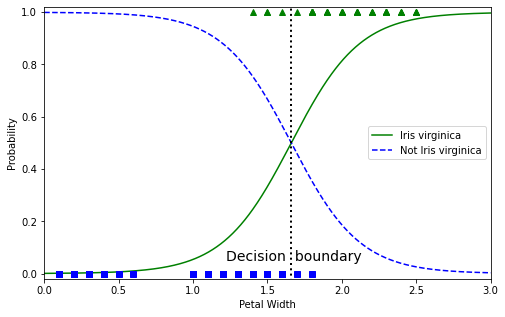

In [241]:
# Plot the model's estimated probabilities as a function of petal width

import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new) # predict probabilities
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # calculate decision boundary

plt.figure(figsize=(8, 5))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.text(decision_boundary+0.02, 0.05, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.legend()
plt.axis([0, 3, -0.02, 1.02])
plt.xlabel("Petal Width")
plt.ylabel("Probability")

Note: In this example, we would have two false positive cases and three false negative cases.

Adding another feature (petal width) might help the classification.

## 2. Logistic Regression with one Class and two Features

In [242]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [243]:
# split data in features and target
# feature: petal width and petal length
# target: Iris virginica y/n

import numpy as np
X = iris["data"][:,2:] # petal length and width
y = (iris["target"]==2) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

# Fit logistic regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Petal width')

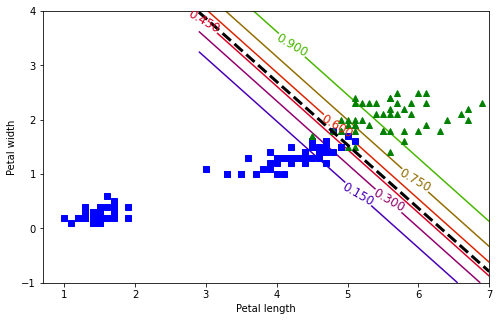

In [244]:
# Plot prediction and decision boundarys

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.figure(figsize=(8, 5))

# contour plot
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(-1, 4, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

# observations and their real class
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.xlabel("Petal length")
plt.ylabel("Petal width")


The dashed line is the decision boundary at which the model is indifferent whether the observation is a positive or negative case (p=50%). 
The colored lines represent the model output propabilities, e.g.purple for 15% probability of a positive case, yellow 75%, and green 90% probability. That way the uncertainty is represented visually.

## 3. Logistic Regression as a Binary Classifier - Full Example

In [245]:
# load data
from sklearn import datasets
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [246]:
# split data in features and target
# feature: petal width and petal length, petal width and petal length
# target: Iris virginica y/n

import numpy as np
X = iris["data"] # sepal length, sepal width, petal length, petal width
y = (iris["target"]==2) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

# shuffle data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [247]:
# Train-test split

X_train = X[:100]
X_test = X[100:]

y_train = y[:100]
y_test = y[100:]

In [248]:
# Fit logistic regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [249]:
# Model validity: Confusion Matrix

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[67,  2],
       [ 1, 30]])

Interpretation:
The confusion matrix shows that the predictions of our current logistic regression model on training data has **2 false positive** and **1 false negative**, but overall seems to work just fine.

In [250]:
# Closer look on False Positives and False Negatives

import pandas as pd
pred_comp = pd.concat([pd.Series(y_train_pred), pd.Series(y_train)], axis=1)
pred_comp.columns = ["y_train_pred", "y_train_real"]
pred_comp

# false positive
fp_observations = pred_comp[(pred_comp["y_train_pred"]==1)&(pred_comp["y_train_real"]==0)].index

# false negative
fn_observations = pred_comp[(pred_comp["y_train_pred"]==0)&(pred_comp["y_train_real"]==1)].index

In [251]:
# show feature values for false positive and false negative
print("False Positive:")
print(X_train[fp_observations])
print("\nFalse Negative:")
print(X_train[fn_observations])

False Positive:
[[6.7 3.  5.  1.7]
 [6.  2.7 5.1 1.6]]

False Negative:
[[6.  3.  4.8 1.8]]


As expected, a closer look on the false positive and false negative predictions show that their feature values are very close to each other. Thus, the two classes are not perfectly separable using the four features we have. Overall, the performance on the training data is quite well.

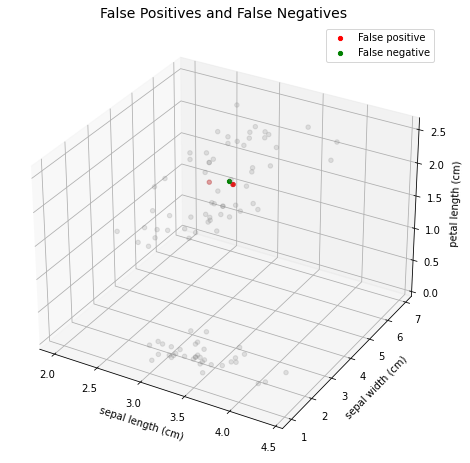

In [252]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# note: one feature is missing since we can only plot a maximum of three features in a 3D space

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)

# plot all correct observations in space
X_correct = np.delete(X_train, fn_observations, 0)
X_correct = np.delete(X_correct, fp_observations, 0)

x_all = X_correct[:,1]
y_all = X_correct[:,2]
z_all = X_correct[:,3]
ax.scatter(x_all, y_all, z_all, color="gray", alpha=0.2)

# false positive
x_fp = X_train[fp_observations, 1]
y_fp = X_train[fp_observations, 2]
z_fp = X_train[fp_observations, 3]
ax.scatter(x_fp, y_fp, z_fp, marker="8", color="red", s=20, label="False positive")

# false negative
x_fn = X_train[fn_observations, 1]
y_fn = X_train[fn_observations, 2]
z_fn = X_train[fn_observations, 3]
ax.scatter(x_fn, y_fn, z_fn, marker="8", color="green", s=20, label="False negative")

# add details to the graph
plt.legend()
plt.title("False Positives and False Negatives", size=14)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
plt.show()

Let's take a look at other ways to assess the validity of the logistic regression model.

We start by looking a precision and recall scores. **Precision** say how correct our predictions have been: "How many of those the model predicted as positive are actually positive?"

**Recall** might sounds similar at first, but has it right the other way around: "How many of the actual positive cases has the model identified?"


The definitions as formulas are:

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)


**A simple example to show the difference:**
Let's say there are 10 positive cases in a population of 30. Our model finds three positive cases and all of them have been correctly classified. The resulting Precision would be 3/3=100%. However, our model misses 7 other positive cases, thus the Recall is only 30%.

A "more risky" model would classify more positive cases, thus increase the Recall. However, it might lead to some false positives which reduces Precision. We have yet another trade-off.

In [253]:
# Precision Recall Plot
from sklearn.metrics import precision_score, recall_score

print("Precision score: " + str(precision_score(y_train, y_train_pred)))
print("Recall score: " + str(recall_score(y_train, y_train_pred)))

Precision score: 0.9375
Recall score: 0.967741935483871


In [254]:
# Alternative: classification report table
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred, target_names=["Not Iris virginica", "Iris virginica"]))

                    precision    recall  f1-score   support

Not Iris virginica       0.99      0.97      0.98        69
    Iris virginica       0.94      0.97      0.95        31

          accuracy                           0.97       100
         macro avg       0.96      0.97      0.97       100
      weighted avg       0.97      0.97      0.97       100



Text(0.5, 1.0, 'Precision-Recall Trade-off')

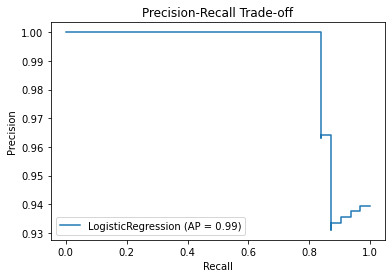

In [255]:
# Plot precision-recall trade-off

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(log_reg, X_train, y_train)
plt.title("Precision-Recall Trade-off")

Text(0.5, 1.0, 'ROC Curve')

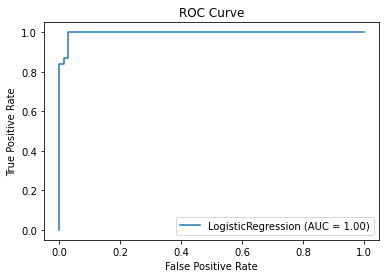

In [256]:
# ROC Curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_reg, X_train, y_train)
plt.title("ROC Curve")

According to the metrics and graphs, our logistic regression models seems to be quite well on training data. 
Let's use the **trained model to predict the on test data** and see how well our model actually performs.

We see, that the model indeed does a great job overall with only one false positive.

In [257]:
# Predict class using trained logistic regression model
y_test_pred = log_reg.predict(X_test)

# Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_test_pred, normalize=True)
print("Accuracy score is: " + str(ac))
print("\n")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))

Accuracy score is: 0.98


Confusion Matrix
[[31  0]
 [ 1 18]]


## 4. Logistic Regression for Multiclass Classification - Full Example

According to [scikit learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), LogisticRegression for multiclass predictions can use the One-versus-Rest approach (OvR) or Softmax Regression when the hyperparameter is set accordingly.

`multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. [...] ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’`

In **One-versus-Rest**, the multiclass problem with x classes is split into x binary problems. Thus, it is a composite model of individual binary logistic regression models. The model estimates the probability for each class and then chooses the one with the highest probability.

Alernatively, we could do **Softmax Regression** by setting multi_class to "multinomial", without training multiple binary classifiers like in OvR. Softmax Regression starts by computing softmax scores for each class, which are then put in the softmax function to calculate the probability of class belonging by incorporating the softmax scores for the other classes.Softmax Regression uses **Cross Entropy cost function**

##### Comparison
While OvR calculates class probabilities completely separately and independently, in Softmax Regression the probabilities are dependent to another. That is why Softmax should only be used for classification problems of mutually exclusive classes.


#### Let's compare both methods for the multiclass problem of the iris dataset.

In [258]:
# load data
from sklearn import datasets
iris = datasets.load_iris()

# split in features and target
X = iris["data"] 
y = (iris["target"]) # multiclass - type of flower

# shuffle data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# Train-test split
X_train = X[:100]
X_test = X[100:]

y_train = y[:100]
y_test = y[100:]

### 4.1 One-versus-Rest (OvR) Approach

In [280]:
# Fit logistic regression model (OvR)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200, multi_class="ovr")
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

In [265]:
log_reg.get_params() 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Accuracy score is: 0.94


Confusion Matrix
[[13  0  0]
 [ 0 16  2]
 [ 0  1 18]]


Text(0.5, 1.0, 'Normalized Confusion Matrix for OvR Logistic Regression\n')

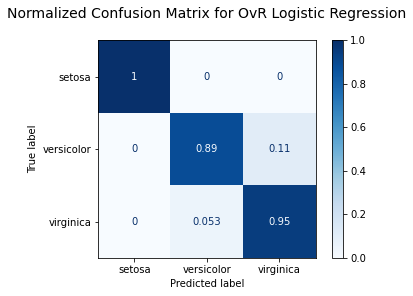

In [279]:
# Predict class using trained logistic regression model
y_test_pred = log_reg.predict(X_test)

# Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_test_pred, normalize=True)
print("Accuracy score is: " + str(ac))
print("\n")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

# Plot normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test, display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize="true")
plt.title("Normalized Confusion Matrix for OvR Logistic Regression\n", size=14)

## 4.2 Softmax Regression

In [285]:
# Fit logistic regression model (Softmax / Multinomial)

from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(max_iter=200, multi_class="multinomial")
softmax_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

Accuracy score is: 0.98


Confusion Matrix
[[13  0  0]
 [ 0 18  0]
 [ 0  1 18]]


Text(0.5, 1.0, 'Normalized Confusion Matrix for Softmax /  Multinomial Logistic Regression\n')

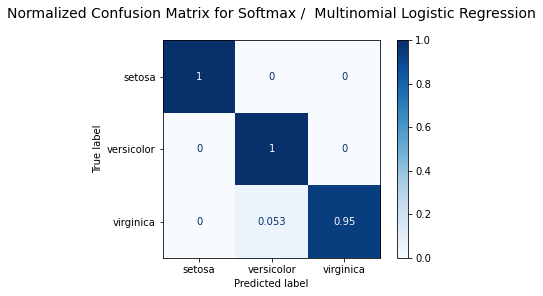

In [286]:
# Predict class using trained logistic regression model
y_test_pred = log_reg.predict(X_test)

# Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_test_pred, normalize=True)
print("Accuracy score is: " + str(ac))
print("\n")

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

# Plot normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(softmax_reg, X_test, y_test, display_labels=iris.target_names, 
                      cmap=plt.cm.Blues, normalize="true")
plt.title("Normalized Confusion Matrix for Softmax /  Multinomial Logistic Regression\n", size=14)

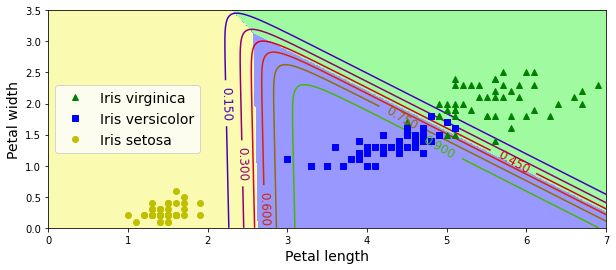

In [293]:
# Plot prediction and decision boundarys (only two features)

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [291]:
X[:,0]

array([6.1, 5.7, 7.7, 6. , 6.8, 5.4, 5.6, 6.9, 6.2, 5.8, 6.5, 4.8, 5.5,
       4.9, 5.1, 6.3, 6.5, 5.6, 5.7, 6.4, 4.7, 6.1, 5. , 6.4, 7.9, 6.7,
       6.7, 6.8, 4.8, 4.8, 4.6, 5.7, 6.7, 4.8, 4.4, 6.3, 6.4, 5.2, 5. ,
       5.2, 5.8, 6. , 6.7, 5.4, 5.4, 5.5, 6.3, 6.4, 6.6, 7.2, 5.7, 7.6,
       5.6, 5.1, 7.7, 5.8, 5.2, 5. , 5.1, 5. , 6.3, 4.8, 5. , 5.1, 5.6,
       5.1, 5.7, 7.7, 4.6, 6.2, 5.7, 5.5, 6. , 5.8, 6. , 5.4, 6.2, 5.5,
       5.4, 5. , 6.4, 5. , 5. , 5.5, 6.7, 4.9, 5.8, 5. , 5. , 5.9, 5.1,
       6.9, 6. , 6.1, 7.7, 5.5, 4.4, 4.3, 6. , 7.2, 4.6, 5.1, 4.4, 6.3,
       6.3, 4.6, 6.8, 6.3, 4.7, 6.1, 6.5, 6.2, 7. , 6.4, 5.1, 6.9, 5.9,
       6.5, 5.7, 5.2, 6.1, 4.5, 6.6, 5.5, 5.3, 5.6, 7.3, 6.7, 5.1, 4.9,
       6.7, 7.2, 4.9, 6.7, 4.9, 6.9, 7.4, 6.3, 5.7, 6.5, 6.3, 6.4, 5.6,
       5.9, 5.4, 6.1, 4.9, 5.8, 5.8, 7.1])

### Interpretation:
We see that the accuracy is score is higher for the Softmax versus the OvR approach. We would expect that since in this dataset the classes (flower types) are mutually exclusive.

The plots of the normalized confusion matrices are another way to compare the two approaches. In the softmax model, only one instance has been incorrectly classified (Virginica was classified as Versicolor) while the OvR approach misclassified three observations.